
# Project: Investigate a Dataset - [amazon.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>

<a id='intro'></a>
## Introduction

### Dataset Description :
### Number of forest fires reported in Brazil by State

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df = pd.read_csv("amazon.csv",encoding = "iso-8859-1")
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [3]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


### Data Cleaning


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [5]:
df.shape

(6454, 5)

In [6]:
# check for missing values:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [7]:
# check for duplicated values:
df.duplicated().any()

True

In [8]:
# drop dupliacted values:

df = df.drop_duplicates()

In [9]:
# check for duplicayed values again:
df.duplicated().any()

False

In [10]:
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [11]:
df["month"].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [12]:
# rename months to english
df["newmonths"] = df["month"].map({"Janeiro":"jan",
                                  "Fevereiro":"feb",
                                  "Março":"march",
                                  "Abril":"april",
                                  "Maio":"may",
                                  "Junho":"jun",
                                  "Julho":"july",
                                  "Agosto":"august",
                                  "Setembro":"sep",
                                  "Outubro":"oct",
                                  "Novembro":"nov",
                                  "Dezembro":"dec"})

In [13]:
df.head()

,year,state,month,number,date,newmonths
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


In [14]:
# drop old month column:
df.drop(columns=["month"], inplace=True)

In [15]:
df.head()

,year,state,number,date,newmonths
0,1998,Acre,0.0,1998-01-01,jan
1,1999,Acre,0.0,1999-01-01,jan
2,2000,Acre,0.0,2000-01-01,jan
3,2001,Acre,0.0,2001-01-01,jan
4,2002,Acre,0.0,2002-01-01,jan


In [16]:
df.dtypes

year           int64
state         object
number       float64
date          object
newmonths     object
dtype: object

In [17]:
df["date"] = pd.to_datetime(df["date"])

In [18]:
df.dtypes

year                  int64
state                object
number              float64
date         datetime64[ns]
newmonths            object
dtype: object

In [19]:
df.head()

,year,state,number,date,newmonths
0,1998,Acre,0.0,1998-01-01,jan
1,1999,Acre,0.0,1999-01-01,jan
2,2000,Acre,0.0,2000-01-01,jan
3,2001,Acre,0.0,2001-01-01,jan
4,2002,Acre,0.0,2002-01-01,jan


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What Is The Total Number of Fires Registered?)

In [20]:
print("The Total Number of Fires Registered Is: ",df.shape[0])

The Total Number of Fires Registered Is:  6422


### Research Question 2  (In Which Month Maximum Number of Forest Fires Were Reported?)

In [21]:
max_mon = df.groupby("newmonths")["number"].sum().reset_index()

max_mon

,newmonths,number
0,april,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,jun,55997.675
7,march,30709.405
8,may,34725.363
9,nov,85508.054


Text(0, 0.5, 'Number of Forest Fires')

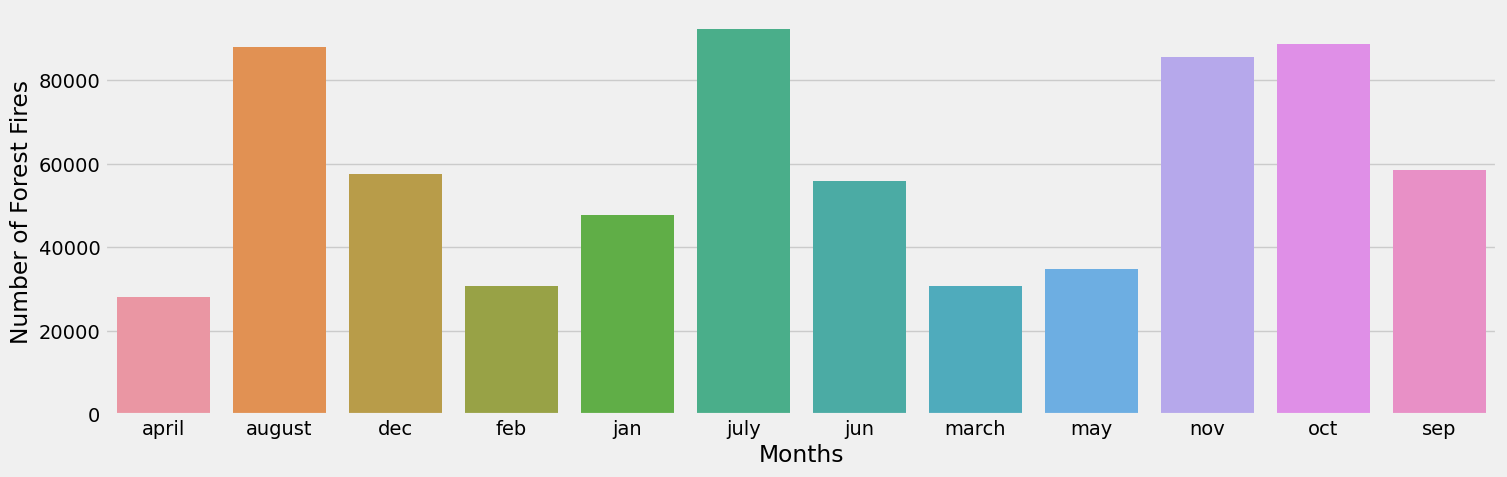

In [22]:
plt.figure(figsize=(16,5) )
sns.barplot(x="newmonths",y="number",data=max_mon)

plt.xlabel("Months")
plt.ylabel("Number of Forest Fires")

### Research Question 3 ( In Which State Maximum Number of Forest Fires Was Reported?)

In [23]:
max_state = df.groupby("state")["number"].sum().reset_index()

max_state.head(3)

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576


Text(0.5, 0, 'Number of Forest Fires')

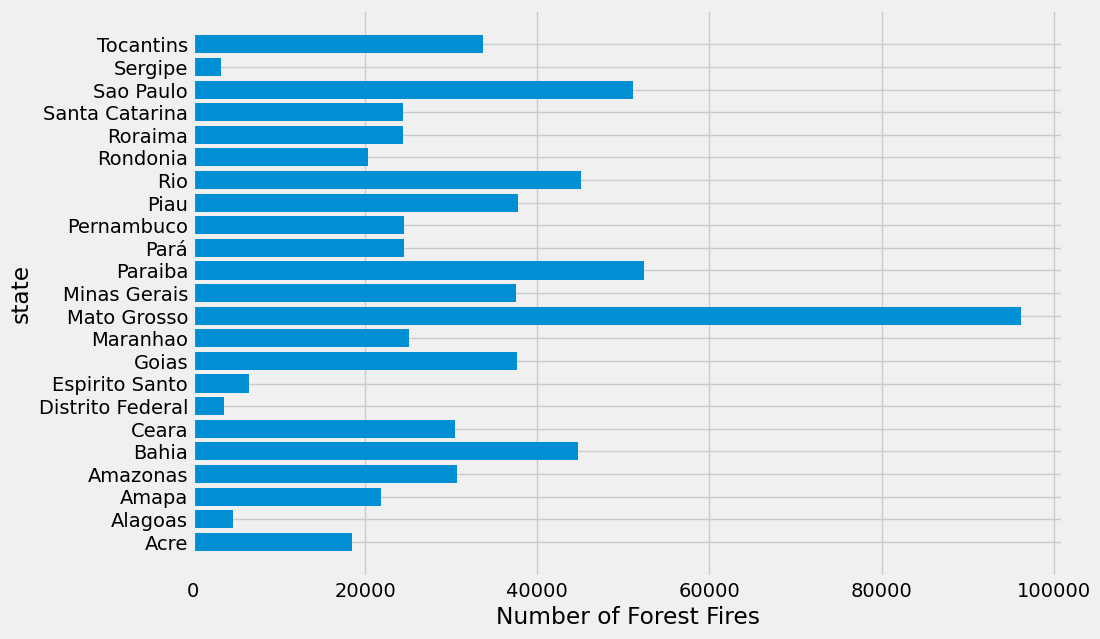

In [24]:
plt.figure(figsize=(10,7) )
plt.barh(max_state["state"],max_state["number"])
plt.ylabel("state")
plt.xlabel("Number of Forest Fires")

### Research Question 4 (In Which Year Maximum Number of Forest Fires Was Reported?)

In [25]:
max_year = df.groupby("year")["number"].sum().reset_index()

max_year.head(3)

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251


Text(0, 0.5, 'Number of Forest Fires')

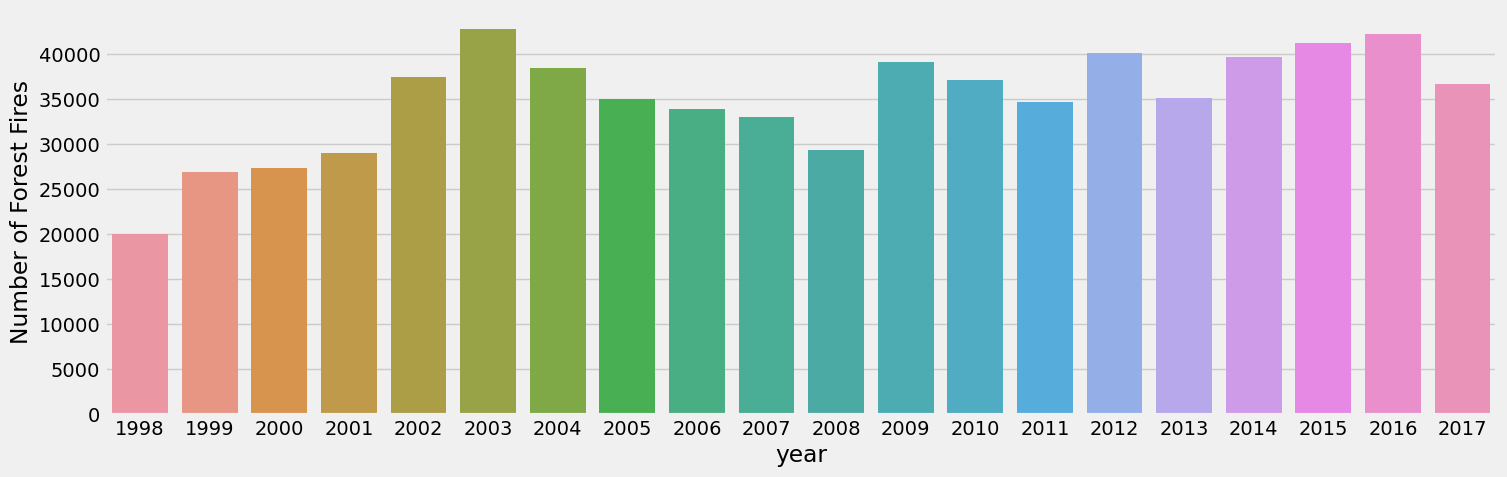

In [26]:
plt.figure(figsize=(16,5) )
sns.barplot(x="year",y="number",data=max_year)

plt.xlabel("year")
plt.ylabel("Number of Forest Fires")

### Research Question 5 (Total Number of Fires Were Reported In Amazonas?)

In [27]:
df.head(2)

,year,state,number,date,newmonths
0,1998,Acre,0.0,1998-01-01,jan
1,1999,Acre,0.0,1999-01-01,jan


In [28]:
filt = df[df["state"] == "Amazonas"]["number"].sum().round()

print("The Total Number of Fires Were Reported In Amazonas:",filt)

The Total Number of Fires Were Reported In Amazonas: 30650.0


### Research Question 6 (Display Number of Fires Were Reported In Amazonas(Year-Wise))


In [29]:
filt1 = df[df["state"] == "Amazonas"]

filt1.head(3)

,year,state,number,date,newmonths
718,1998,Amazonas,0.0,1998-01-01,jan
719,1999,Amazonas,3.0,1999-01-01,jan
720,2000,Amazonas,7.0,2000-01-01,jan


In [30]:
year_grp = filt1.groupby("year")["number"].sum().reset_index()

year_grp

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


Text(0, 0.5, 'Number of Fires Were Reported In Amazonas(Year-Wise)')

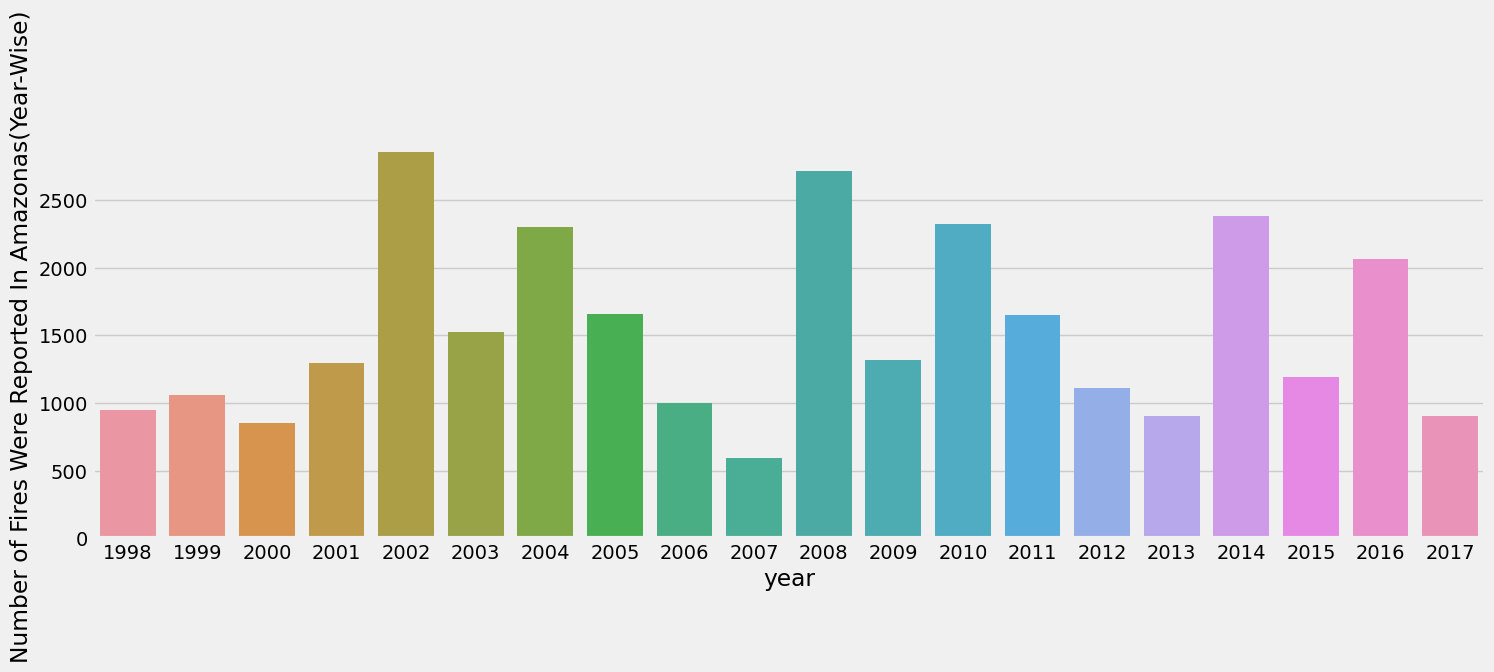

In [31]:
plt.figure(figsize=(16,5))

sns.barplot(x="year",y="number",data=year_grp)

plt.xlabel("year")
plt.ylabel("Number of Fires Were Reported In Amazonas(Year-Wise)")

### Research Question 7 (Display Number of Fires Were Reported In Amazonas (Day-Wise))

In [32]:
df["dayname"] = df["date"].dt.day_name()

df.head(5)

,year,state,number,date,newmonths,dayname
0,1998,Acre,0.0,1998-01-01,jan,Thursday
1,1999,Acre,0.0,1999-01-01,jan,Friday
2,2000,Acre,0.0,2000-01-01,jan,Saturday
3,2001,Acre,0.0,2001-01-01,jan,Monday
4,2002,Acre,0.0,2002-01-01,jan,Tuesday


In [33]:
filt2 = df[df["state"] == "Amazonas"]

filt2.head(3)

,year,state,number,date,newmonths,dayname
718,1998,Amazonas,0.0,1998-01-01,jan,Thursday
719,1999,Amazonas,3.0,1999-01-01,jan,Friday
720,2000,Amazonas,7.0,2000-01-01,jan,Saturday


In [34]:
day_grp = filt2.groupby("dayname")["number"].sum().reset_index()

day_grp

,dayname,number
0,Friday,5446.480
1,Monday,1886.601
2,Saturday,4162.666
3,Sunday,3015.186
4,Thursday,5754.802
5,Tuesday,6474.217
6,Wednesday,3910.177


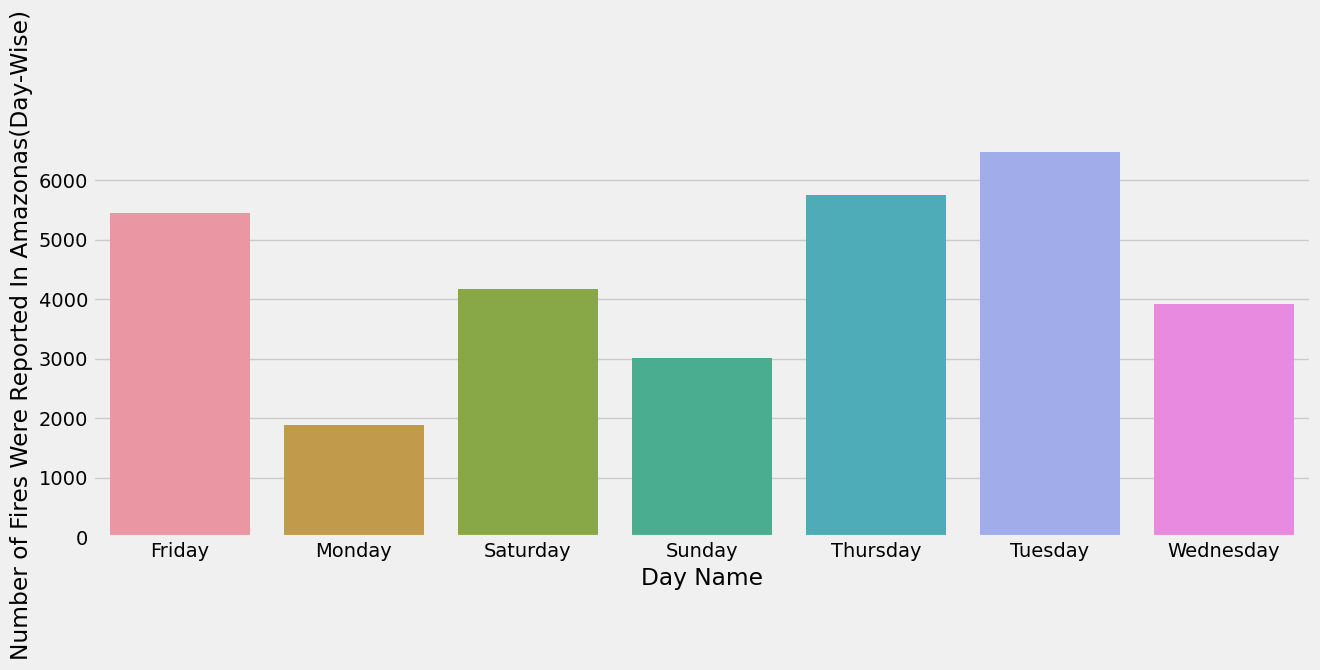

In [35]:
plt.figure(figsize=(14,5))

sns.barplot(x="dayname",y="number",data=day_grp)

plt.xlabel("Day Name")
plt.ylabel("Number of Fires Were Reported In Amazonas(Day-Wise)")
plt.show()

### Research Question 8 (Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’)


In [36]:
filt3 = df[df["year"] == 2015]

filt3

,year,state,number,date,newmonths,dayname
17,2015,Acre,1.000,2015-01-01,jan,Thursday
37,2015,Acre,2.000,2015-01-01,feb,Thursday
57,2015,Acre,2.000,2015-01-01,march,Thursday
77,2015,Acre,3.000,2015-01-01,april,Thursday
97,2015,Acre,2.000,2015-01-01,may,Thursday
...,...,...,...,...,...,...
6372,2015,Tocantins,2.540,2015-01-01,august,Thursday
6392,2015,Tocantins,5.510,2015-01-01,sep,Thursday
6412,2015,Tocantins,4.844,2015-01-01,oct,Thursday
6432,2015,Tocantins,833.000,2015-01-01,nov,Thursday


In [37]:
mon_grp = filt3.groupby("newmonths")["number"].sum().reset_index()

mon_grp.head()

,newmonths,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000


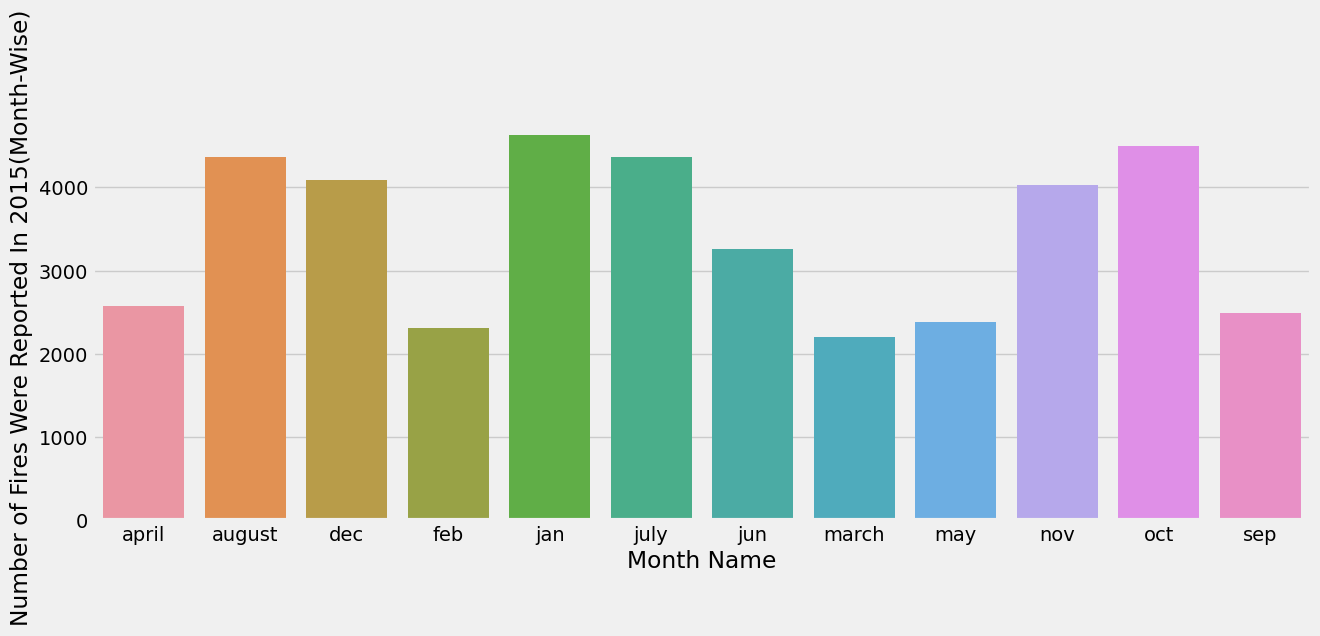

In [38]:
plt.figure(figsize=(14,5))

sns.barplot(x="newmonths",y="number",data=mon_grp)

plt.xlabel("Month Name")
plt.ylabel("Number of Fires Were Reported In 2015(Month-Wise)")
plt.show()

### Research Question 9 (What Is The Average Number of Fires Were Reported From Highest to Lowest (State-Wise)?)


In [39]:
state_grp = df.groupby("state")["number"].mean().sort_values(ascending=False).reset_index()

In [40]:
state_grp

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


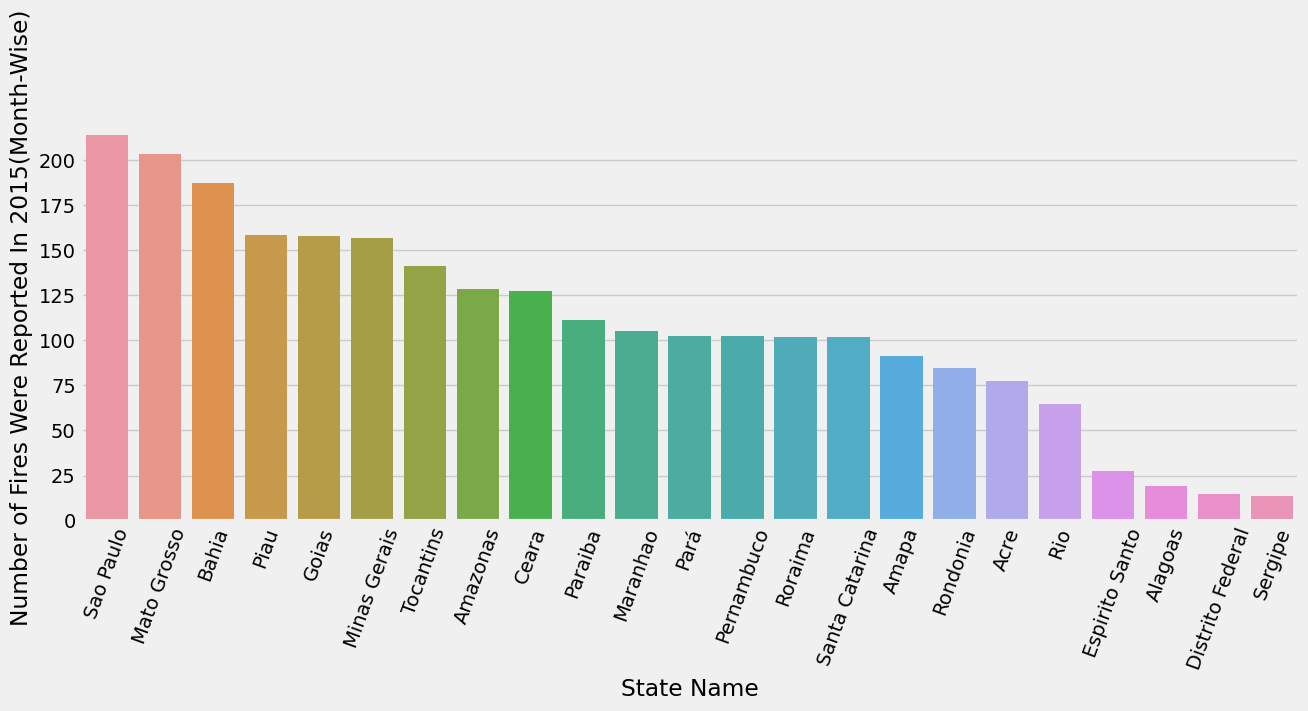

In [41]:
plt.figure(figsize=(14,5))

sns.barplot(x="state",y="number",data=state_grp)

plt.xlabel("State Name")
plt.ylabel("Number of Fires Were Reported In 2015(Month-Wise)")
plt.xticks(rotation = 70)
plt.show()